# Proyek Analisis Data: `E-commerce-public-dataset`
- **Nama:** Mohamad Fikri Aulya Nor
- **Email:** mohfikri.aulyanor@gmail.com
- **ID Dicoding:** nairkivm

## Menentukan Pertanyaan Bisnis

- Apa hubungan antara penilaian ulasan (*score review*) dengan penjualan produk?
- Dimana lokasi geografis dengan tingkat penggunaan produk tertinggi.
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from utils.constants import Constants
from utils.utils import DataUtils
from unidecode import unidecode

## Data Wrangling

### Gathering Data

In [2]:
# Initialize the constants
c = Constants()

# Extract all data into dictionary of pandas DataFrames
data = {}
for source_ in c.source.keys():
    data[source_] = pd.read_csv(c.source[source_])

**Insight:**
- Terdapat 9 tabel dalam dataset ini
- Hubungan antartabel digambarkan dalam diagram *entity-relationship* berikut.

![ERD e-commerce-public-dataset](\assets\e-commerce-public.png)

### Assessing Data

Data Assessment for 'customers':
 > Data shape:  (99441, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'customer_zip_code_prefix' column should be in 'object' (original: int64)!
 > There is no missing value columns v


 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'geolocations':
 > Data shape:  (1000163, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'geolocation_zip_code_prefix' column should be in 'object' (original: int64)!
 > There is no missing value columns v
 > Duplicated data count:  390005
 > The outliers (geolocation_lat, geolocation_lng): 


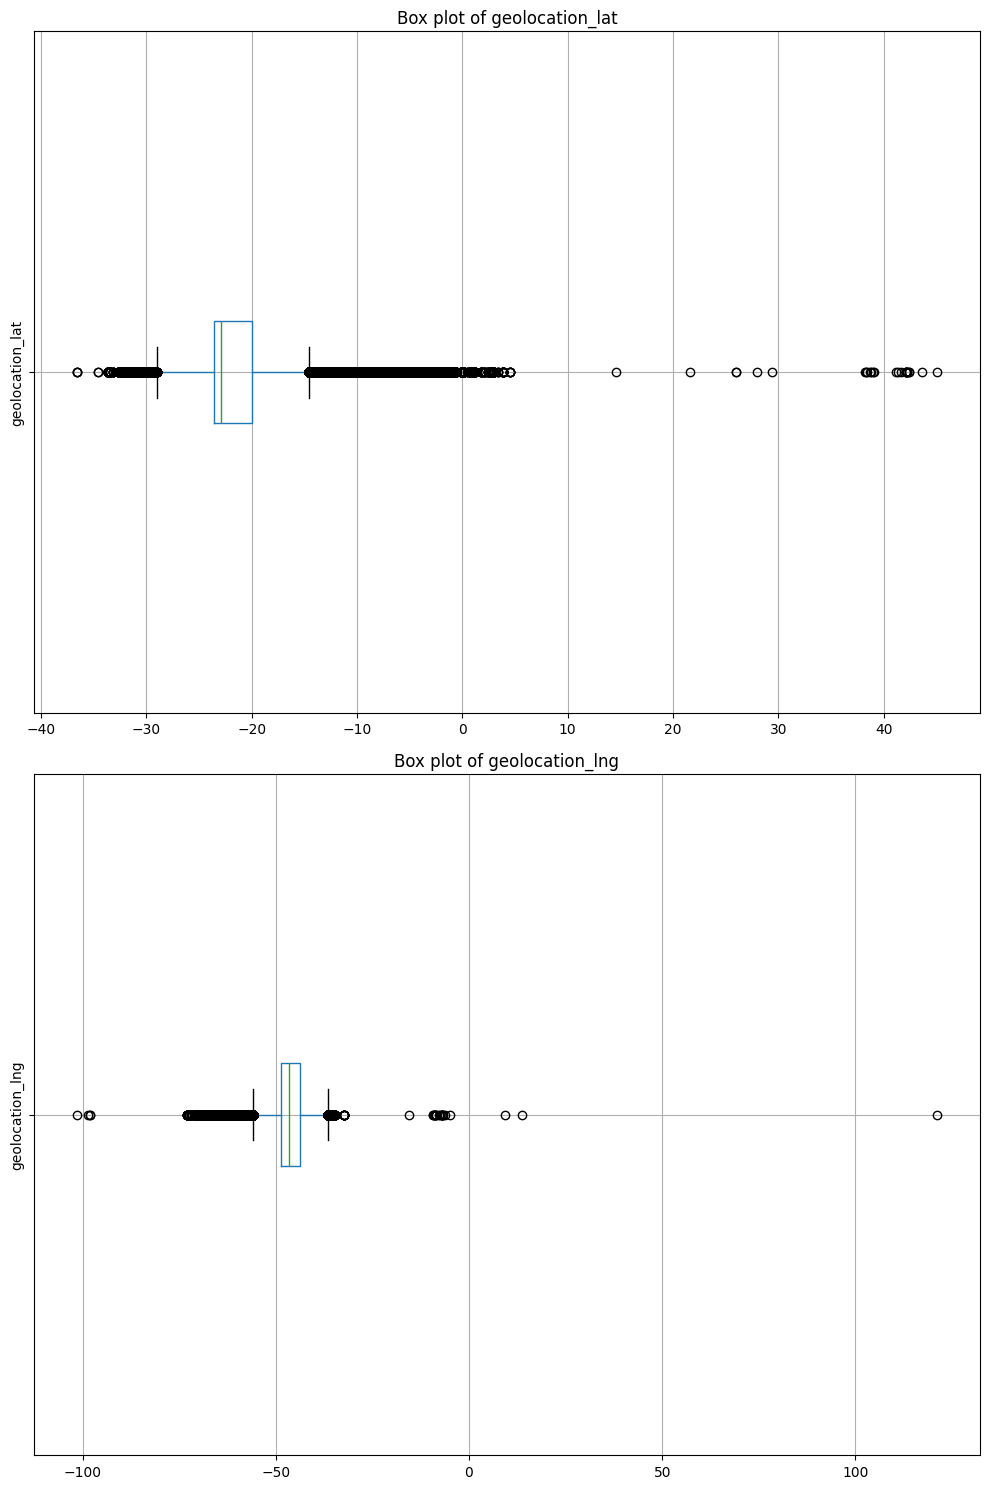

Data Assessment for 'order_items':
 > Data shape:  (112650, 7)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'shipping_limit_date' column should be in 'datetime64[ns]' (original: object)!
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (order_item_id, price, freight_value): 


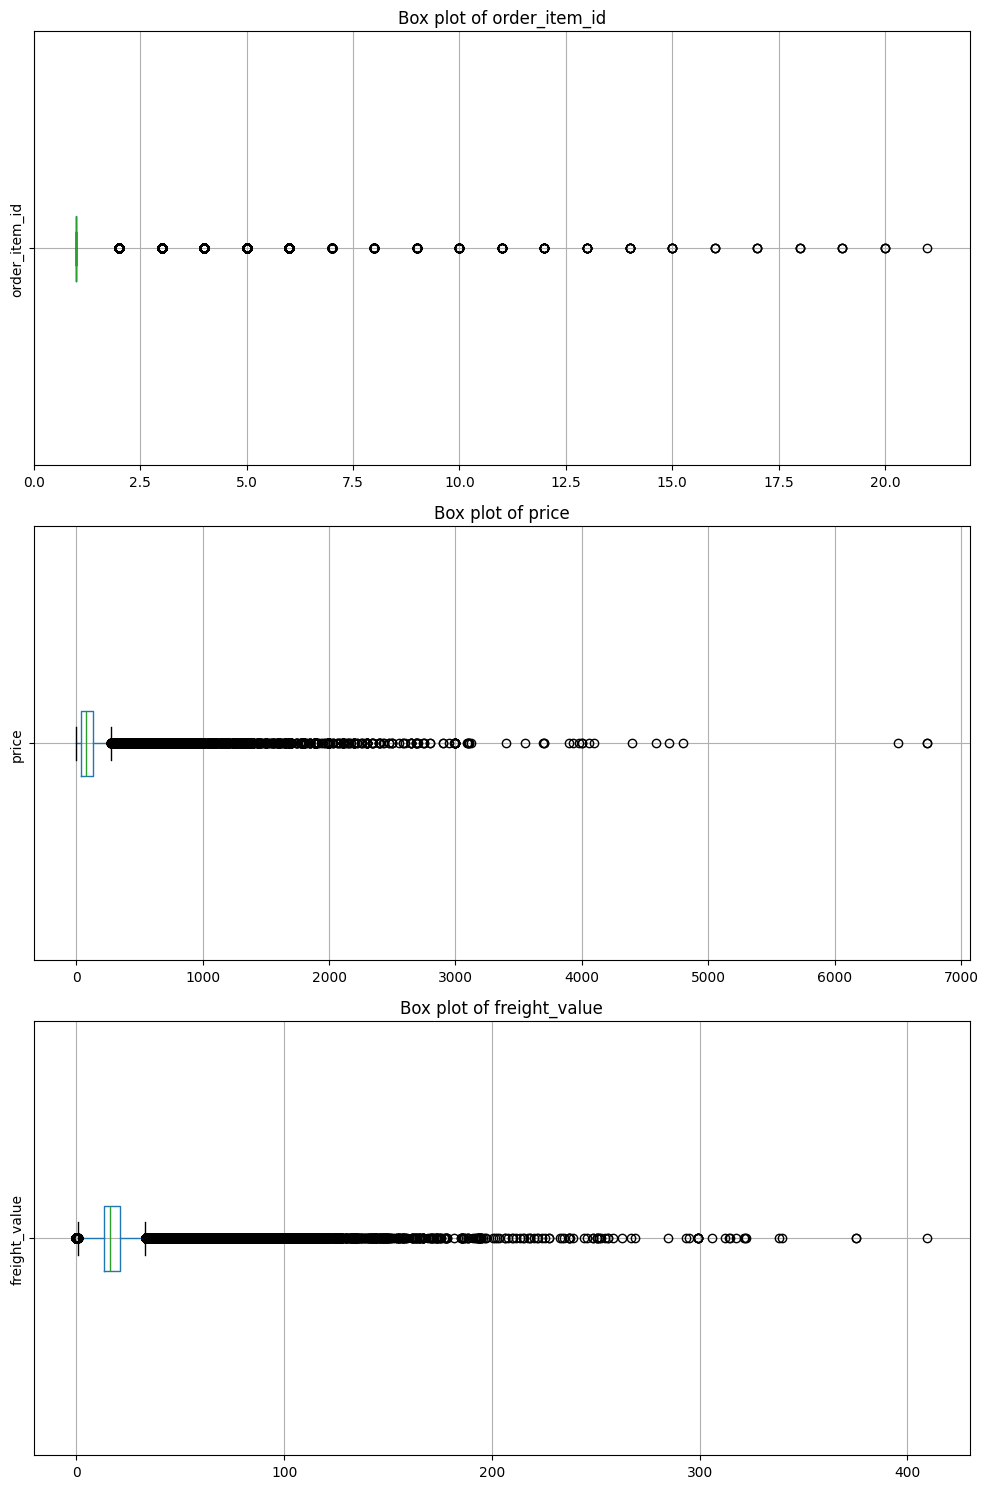

Data Assessment for 'order_payments':
 > Data shape:  (103886, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (payment_sequential, payment_installments, payment_value): 


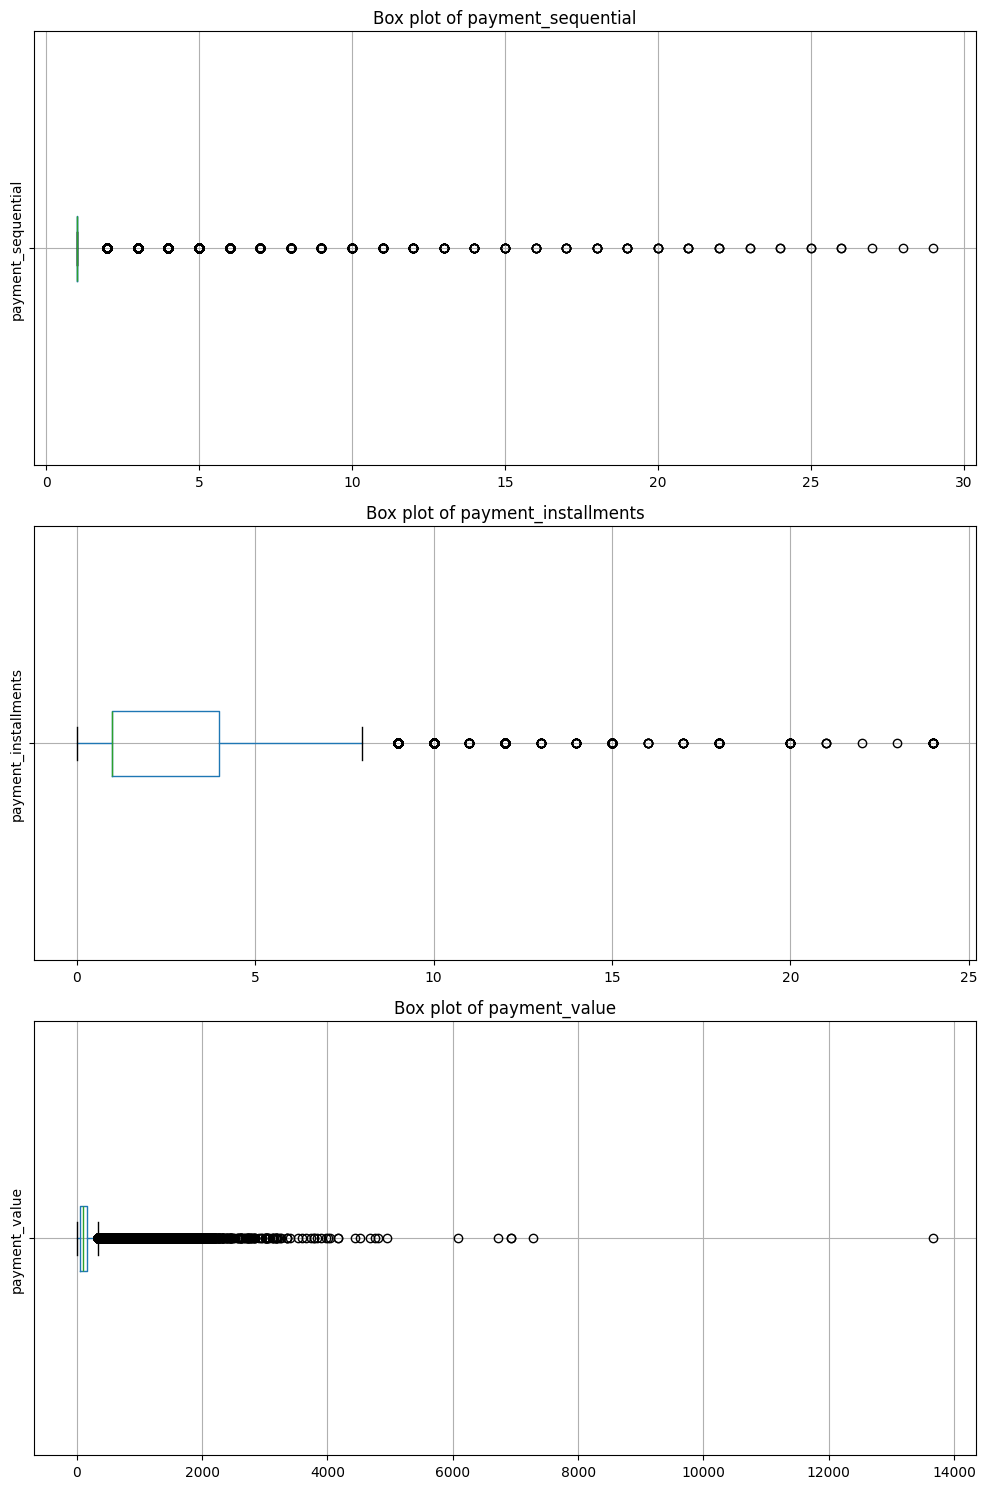

Data Assessment for 'order_reviews':
 > Data shape:  (99224, 7)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'review_score' column should be in 'float64' (original: int64)!
      02. 'review_creation_date' column should be in 'datetime64[ns]' (original: object)!
      03. 'review_answer_timestamp' column should be in 'datetime64[ns]' (original: object)!
 > Missing value columns:
      - review_comment_title column : 88.34% (87656)
      - review_comment_message column : 58.70% (58247)
 > There is no duplicated data v
 > The outliers (review_score): 


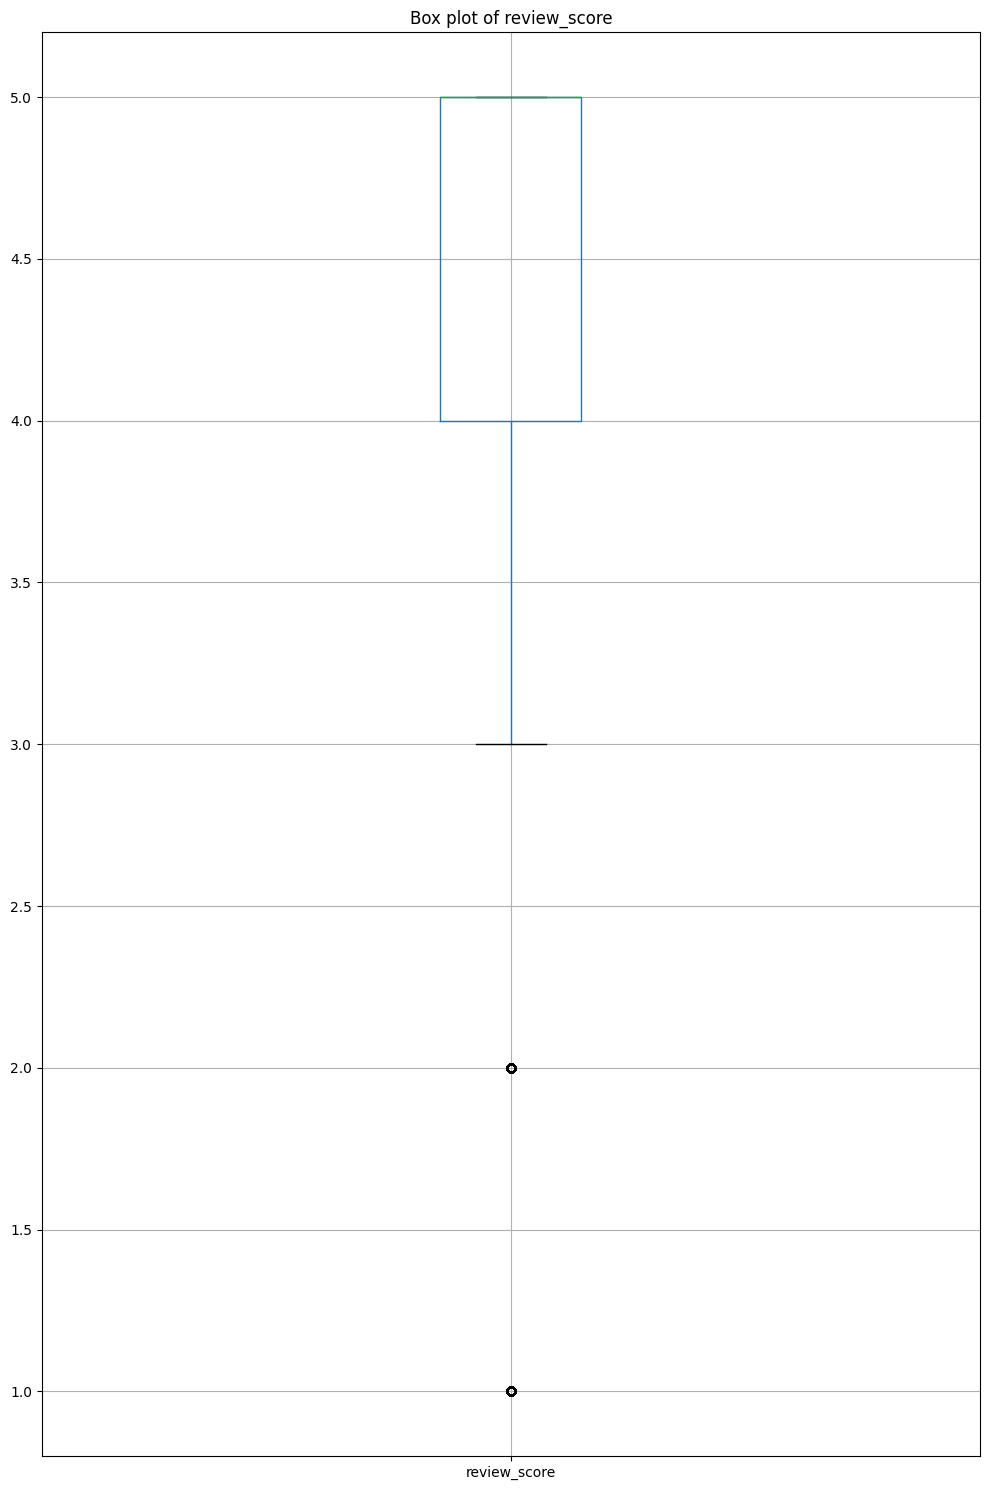

Data Assessment for 'orders':
 > Data shape:  (99441, 8)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'order_purchase_timestamp' column should be in 'datetime64[ns]' (original: object)!
      02. 'order_approved_at' column should be in 'datetime64[ns]' (original: object)!
      03. 'order_delivered_carrier_date' column should be in 'datetime64[ns]' (original: object)!
      04. 'order_delivered_customer_date' column should be in 'datetime64[ns]' (original: object)!
      05. 'order_estimated_delivery_date' column should be in 'datetime64[ns]' (original: object)!
 > Missing value columns:
      - order_approved_at    column : 0.16% (160 )
      - order_delivered_carrier_date column : 1.79% (1783)
      - order_delivered_customer_date column : 2.98% (2965)
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'product_category_name_translations':
 > Data shape:  (71, 2)
 

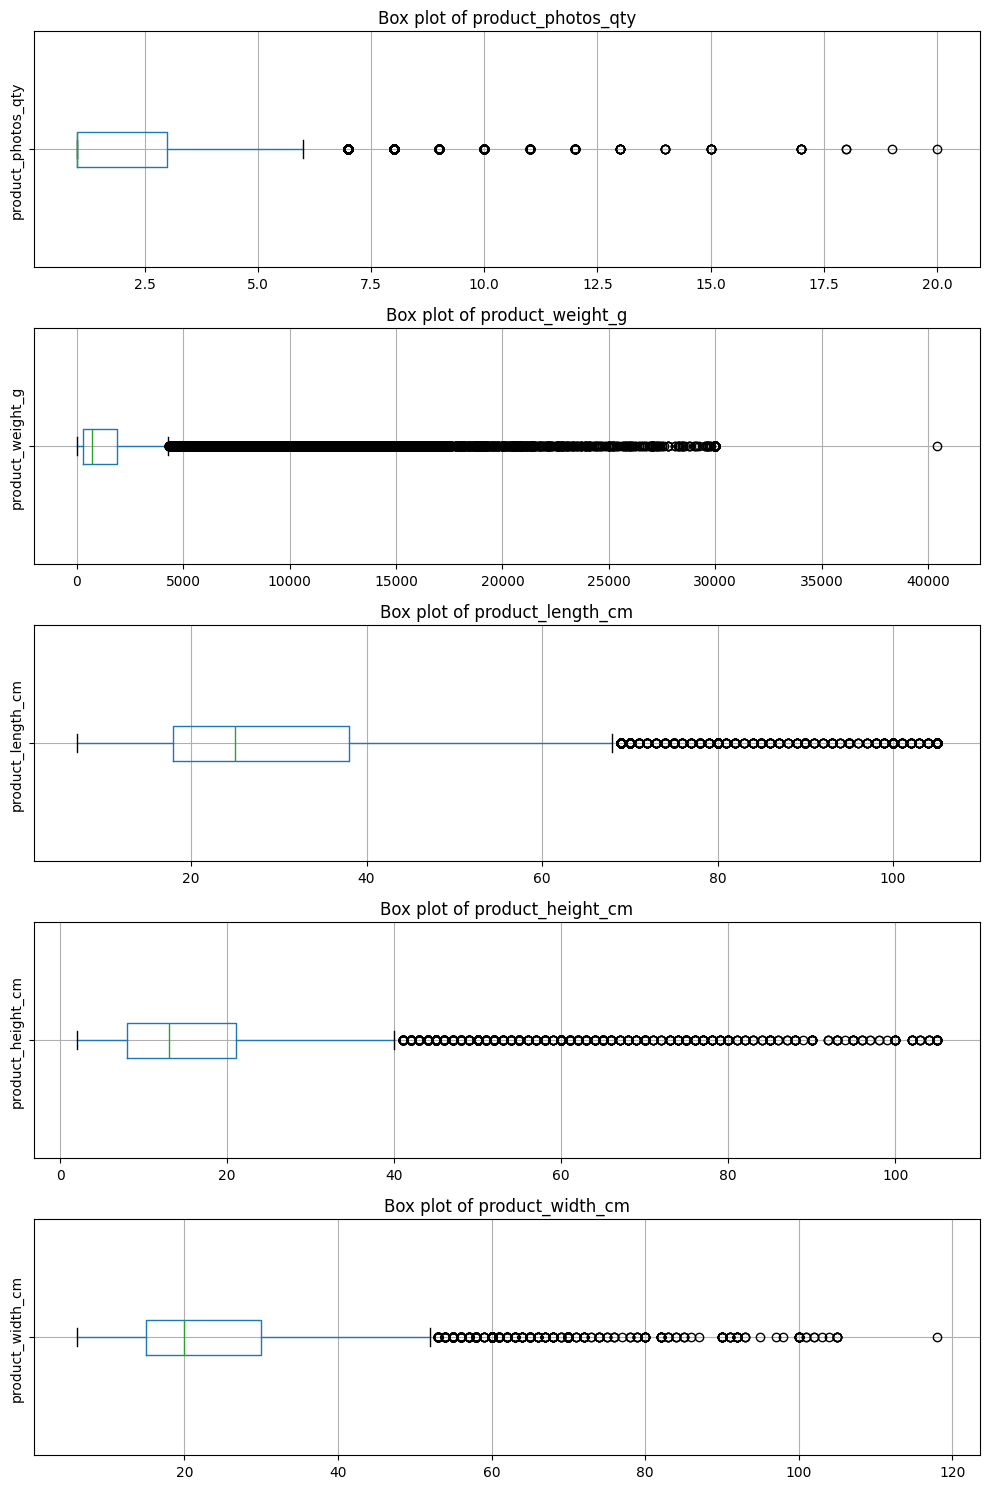

Data Assessment for 'sellers':
 > Data shape:  (3095, 4)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'seller_zip_code_prefix' column should be in 'object' (original: int64)!
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers


In [3]:
# Initialize DataUtils
u = DataUtils()

# Assess the data using asses_data
for source_ in c.source.keys():
    u.asses_data(data[source_], source_)

**Insight:**

- Masih banyak kolom dengan tipe data yang tidak sesuai *requirements*

    <details>

    <summary> <i>Lihat detail</i> </summary>

  - "customers"
    - 'customer_zip_code_prefix' column should be in 'object' (original: int64)
  - "geolocations"
    - 'geolocation_zip_code_prefix' column should be in 'object' (original: int64)
  - "order_items"
    - 'shipping_limit_date' column should be in 'datetime64[ns]' (original: object)
  - "order_reviews"
    - 'review_creation_date' column should be in 'datetime64[ns]' (original: object)
    - 'review_answer_timestamp' column should be in 'datetime64[ns]' (original: object)
  - "orders"
    - 'order_purchase_timestamp' column should be in 'datetime64[ns]' (original: object)
    - 'order_approved_at' column should be in 'datetime64[ns]' (original: object)
    - 'order_delivered_carrier_date' column should be in 'datetime64[ns]' (original: object)
    - 'order_delivered_customer_date' column should be in 'datetime64[ns]' (original: object)
    - 'order_estimated_delivery_date' column should be in 'datetime64[ns]' (original: object)
  - "products"
    - 'product_photos_qty' column should be in 'int64' (original: float64)
  - "sellers"
    - 'seller_zip_code_prefix' column should be in 'object' (original: int64)

    </details> 

<br>

- Kolom 'product_name_lenght' dan 'product_description_lenght' pada tabel "products" mengalami kesalahan penulisan
- Ada beberapa data yang mempunyai *missing value*

    <details>

    <summary> <i>Lihat detail</i> </summary>

  - "order_reviews"
    - review_comment_title column : 88.34% (87656)
    - review_comment_message column : 58.70% (58247)
  - "orders"
    - order_approved_at    column : 0.16% (160 )
    - order_delivered_carrier_date column : 1.79% (1783)
    - order_delivered_customer_date column : 2.98% (2965)
  - "products"
    - product_category_name column : 1.85% (610 )
    - product_photos_qty   column : 1.85% (610 )
    - product_weight_g     column : 0.01% (2   )
    - product_length_cm    column : 0.01% (2   )
    - product_height_cm    column : 0.01% (2   )
    - product_width_cm     column : 0.01% (2   )

    </details>

<br>

- Ada beberapa data yang duplikat, yaitu tabel "geolocations" sebanyak 390005 baris.

- Ada beberapa data yang memiliki outlier.

    <details>

    <summary> <i>Lihat detail</i> </summary>

  - "geolocations": geolocation_lat, geolocation_lng
  - "orders": price, freight_value
  - "order_payments": payment_sequential, payment_installments, payment_value
  - "order_reviews": review_score
  - "products": product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

    </details>

<br>

### Cleaning Data

C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\3692922497.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.08642062404257' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self._obj.loc[condition_more_than, col] = mean


Data Assessment for 'customers':
 > Data shape:  (99441, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'geolocations':
 > Data shape:  (19015, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (geolocation_lat, geolocation_lng): 


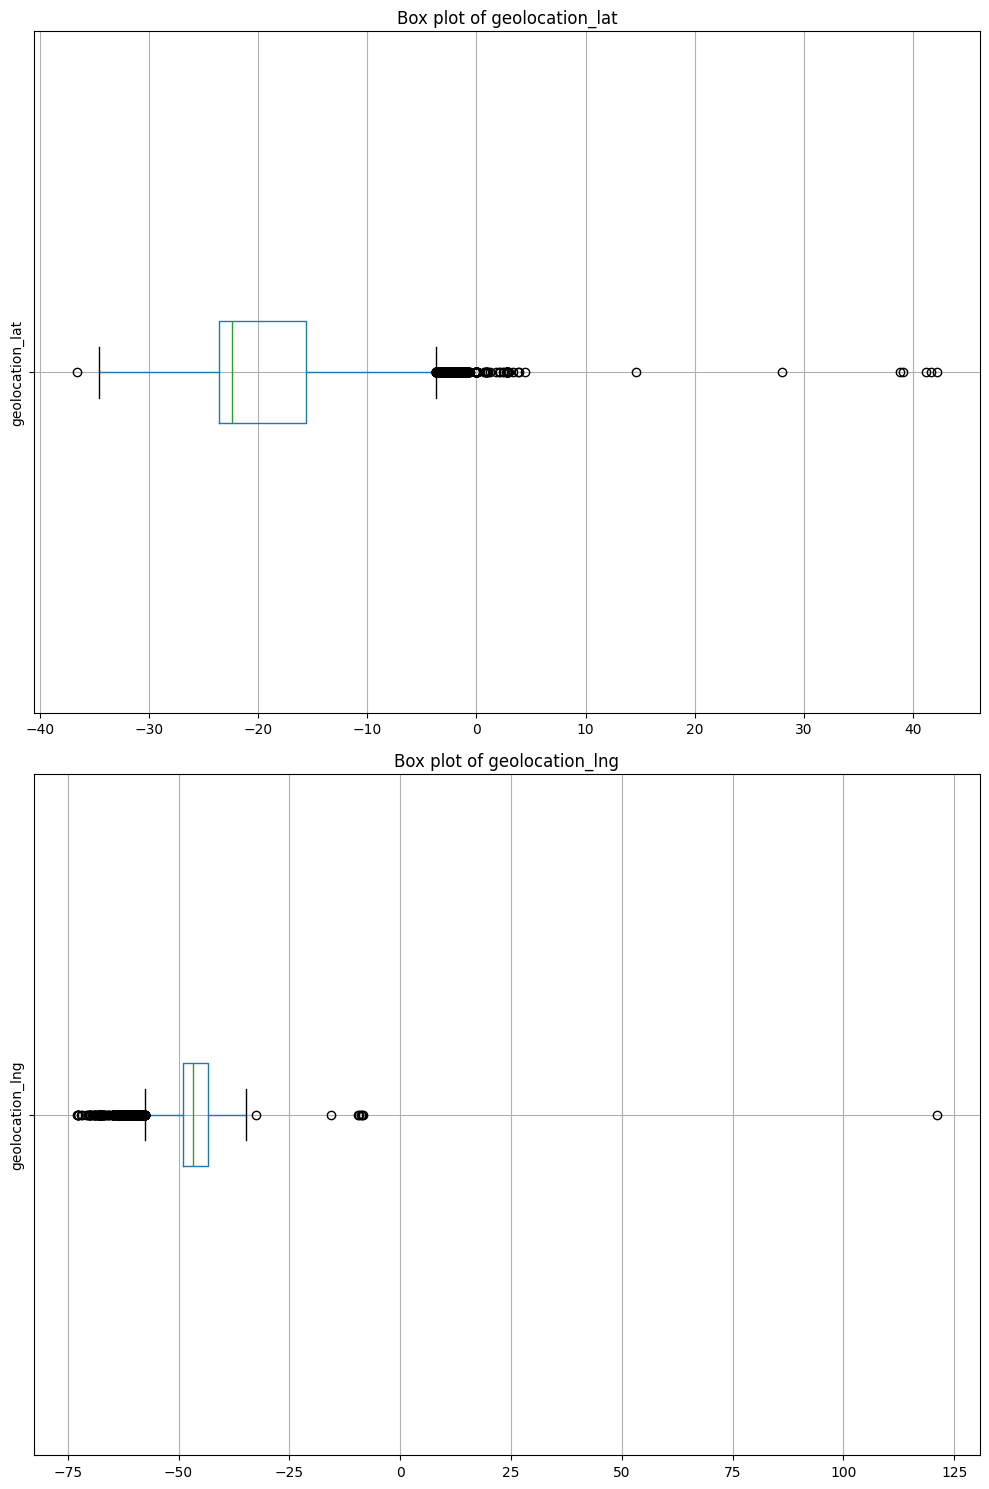

Data Assessment for 'order_items':
 > Data shape:  (112650, 7)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (order_item_id, price, freight_value): 


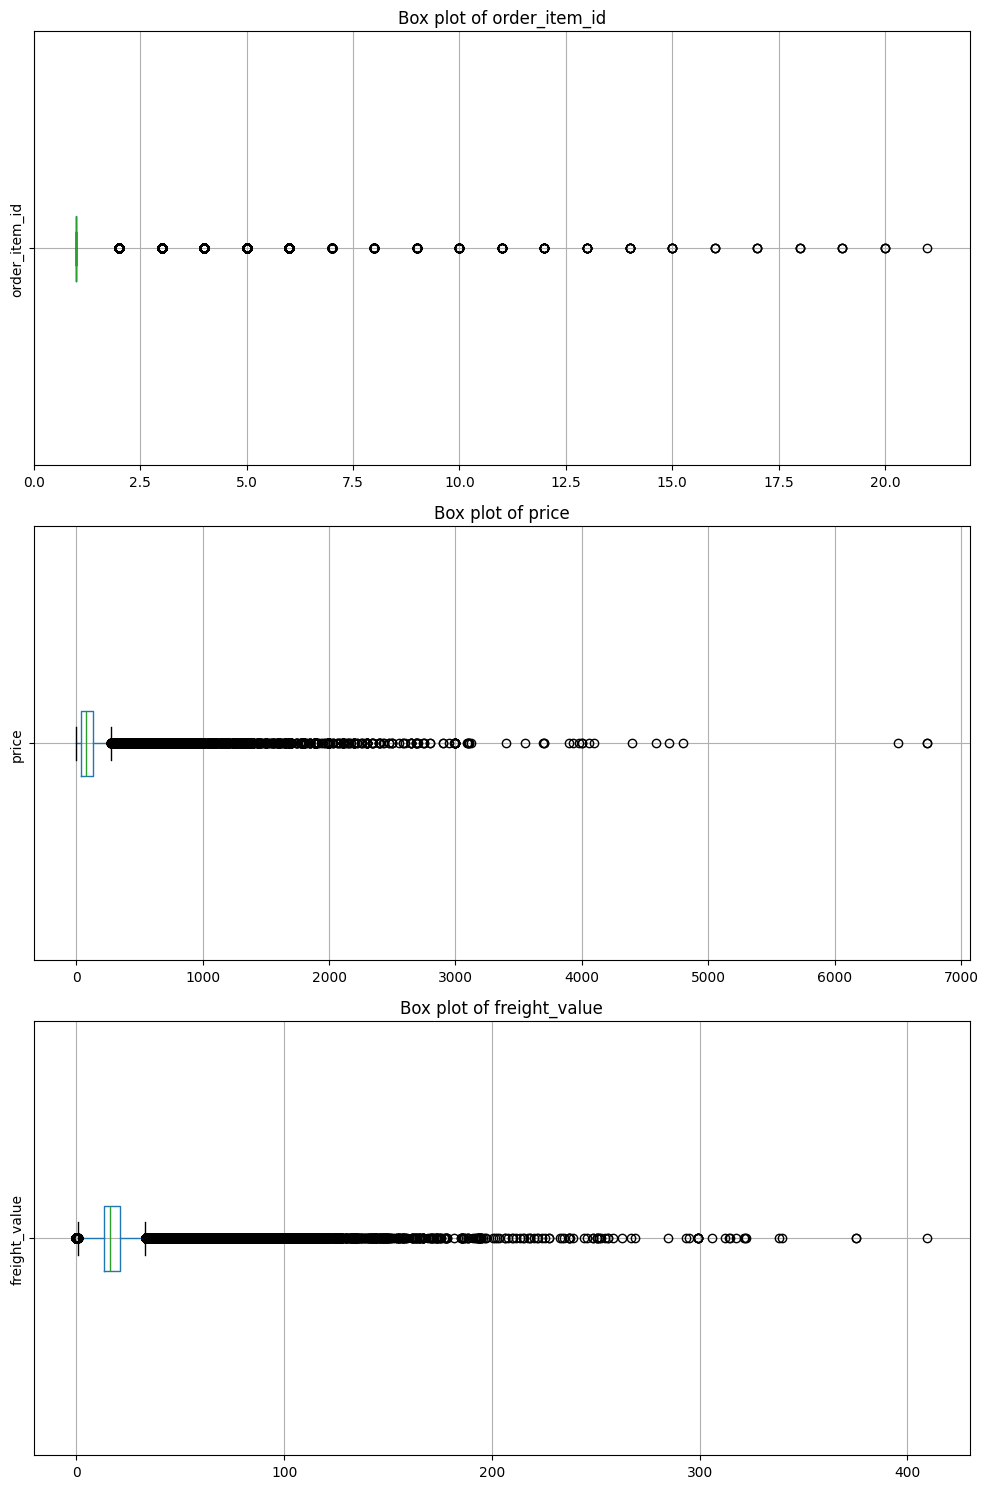

Data Assessment for 'order_payments':
 > Data shape:  (103886, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (payment_sequential, payment_installments, payment_value): 


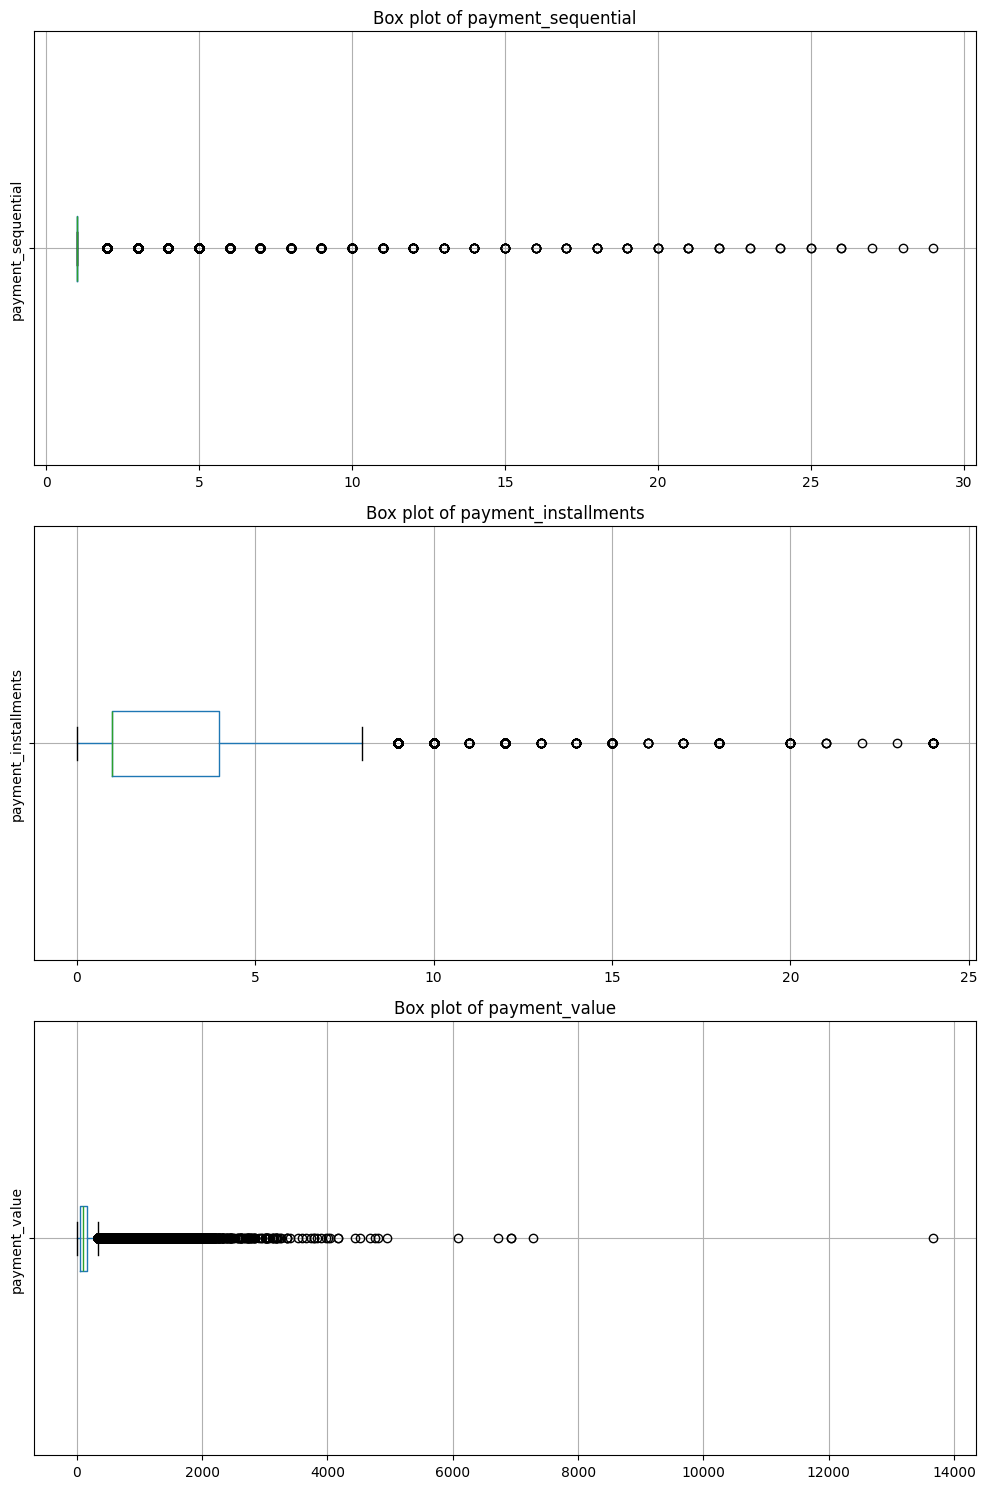

Data Assessment for 'order_reviews':
 > Data shape:  (99224, 8)
 > Columns that should be dropped:
      01. order_reviews
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - review_comment_title column : 88.34% (87656)
      - review_comment_message column : 58.70% (58247)
 > There is no duplicated data v
 > The outliers (review_score): 


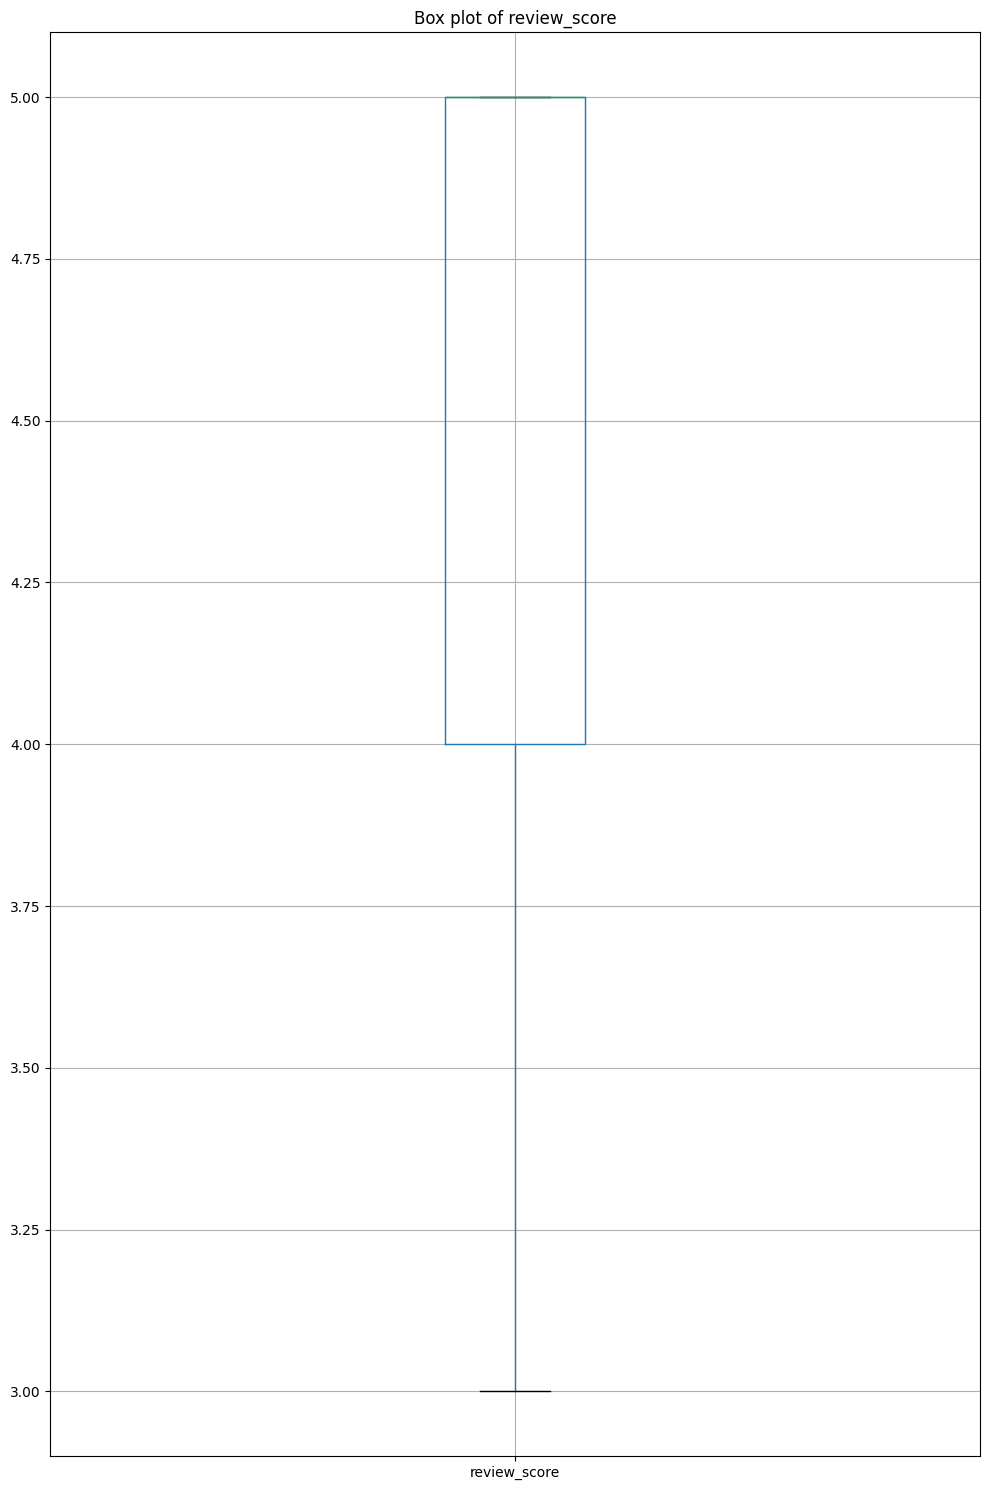

Data Assessment for 'orders':
 > Data shape:  (99441, 8)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - order_approved_at    column : 0.16% (160 )
      - order_delivered_carrier_date column : 1.79% (1783)
      - order_delivered_customer_date column : 2.98% (2965)
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'product_category_name_translations':
 > Data shape:  (71, 2)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'products':
 > Data shape:  (32951, 9)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - pr

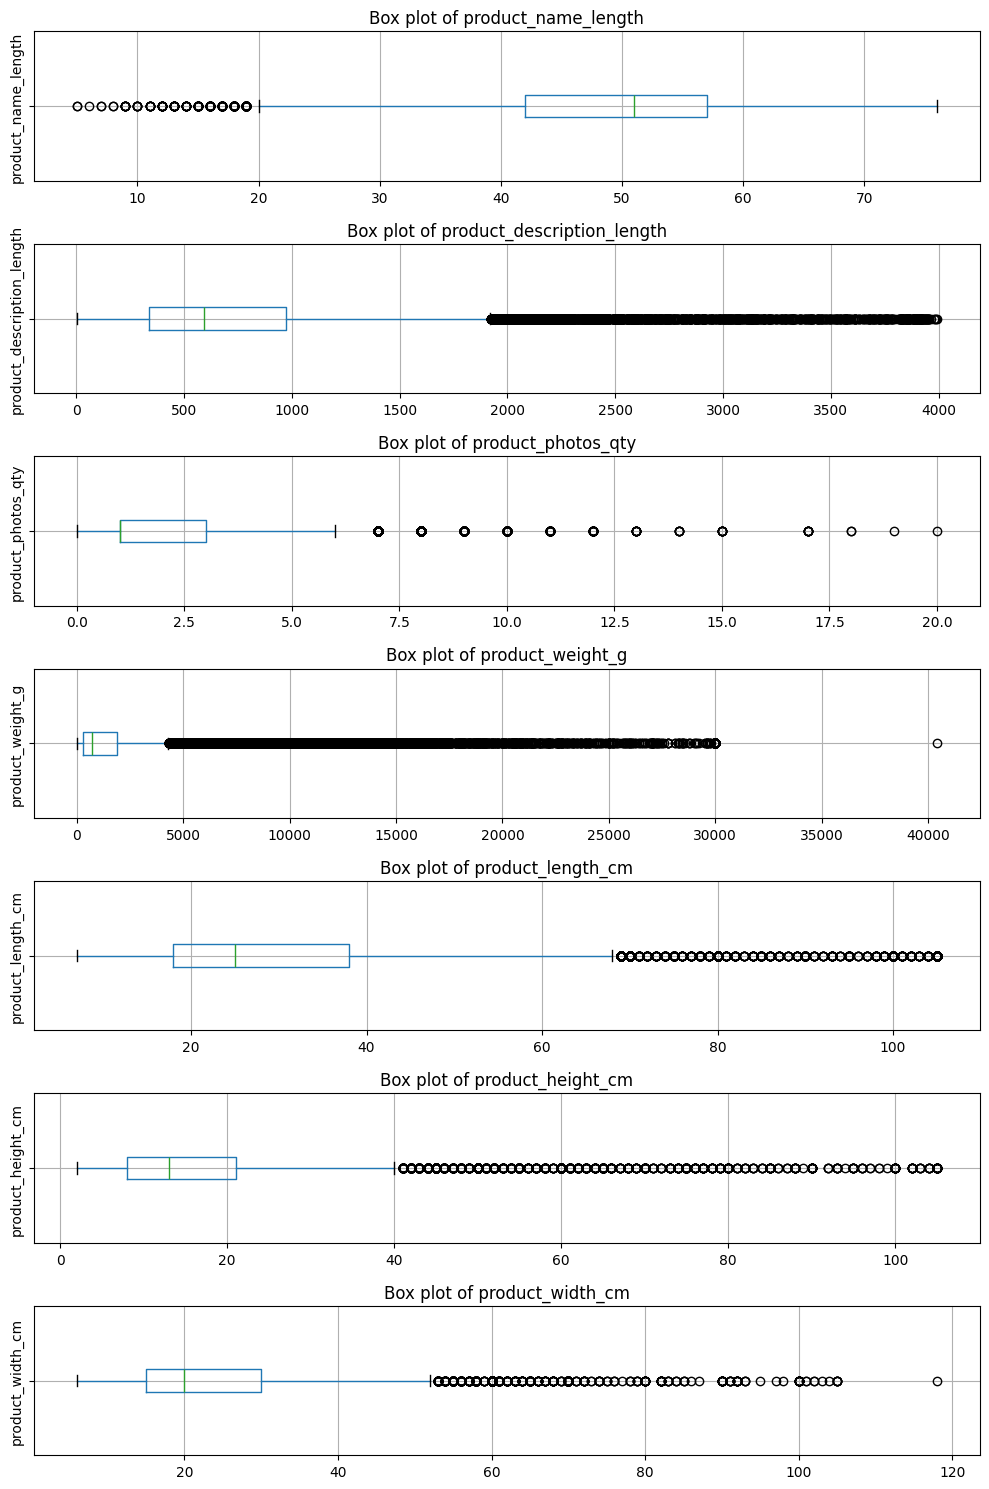

Data Assessment for 'sellers':
 > Data shape:  (3095, 4)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers


In [4]:
# Create modified_data variable
modified_data = data

# Correct invalid column names
column_replacement = {
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}
modified_data['products'] = (
    modified_data['products']
    .rename(columns=column_replacement)
)

# Remove duplicated data
modified_data['geolocations'] = (
    modified_data['geolocations']
    .drop_duplicates(subset='geolocation_zip_code_prefix', ignore_index=True)
)

# Handle missing value
## Handle missing value for
## - product_photos_qty column in products table
##   - Use imputation method with value=0
modified_data['products']['product_photos_qty'] = (
    modified_data['products']['product_photos_qty']
    .fillna(value=0)
)

## Handle missing value for
## - product_weight_g, product_length_cm, product_height_cm, product_width_cm columns in products table
##   - Use imputation method with value=mean
missing_value_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in missing_value_columns:
    modified_data['products'][col] = (
        modified_data['products'][col]
        .fillna(value=modified_data['products'][col].mean())
    )

# Handle outlier value for
## - review_score in order_reviews table
##   - Use imputation method with value = mean

## Add a custom method to pandas DataFrame
### Register a "custom" accessor and add "impute_outlier"
@pd.api.extensions.register_dataframe_accessor("custom")
class CustomAccessor:
    def __init__(self, pandas_obj):
        self._obj = pandas_obj

    def impute_outlier(self, col: str):
        Q1 = (self._obj[col]).quantile(0.25)
        Q3 = (self._obj[col]).quantile(0.75)
        IQR = Q3 - Q1
        
        maximum = Q3 + (1.5*IQR)
        minimum = Q1 - (1.5*IQR)

        condition_lower_than = self._obj[col] < minimum
        condition_more_than = self._obj[col] > maximum

        mean = self._obj[col].mean()

        self._obj.loc[condition_more_than, col] = mean
        self._obj.loc[condition_lower_than, col] = mean

        return self._obj

## Apply the method
modified_data['order_reviews'] = (
    modified_data['order_reviews']
    .custom.impute_outlier('review_score')
)

## Ensure the result is between 'review_score' range [1,5] (0 = no participation)
max_condition = modified_data['order_reviews']['review_score'] > 5
min_condition = (modified_data['order_reviews']['review_score'] < 1) & (modified_data['order_reviews']['review_score'].notna())

modified_data['order_reviews'].loc[max_condition, 'order_reviews'] = 5
modified_data['order_reviews'].loc[min_condition, 'order_reviews'] = 1

## Ad-hoc: Normalize the city names
modified_data['geolocations']['geolocation_city'] = modified_data['geolocations']['geolocation_city'].apply(unidecode)
modified_data['customers']['customer_city'] = modified_data['customers']['customer_city'].apply(unidecode)
modified_data['sellers']['seller_city'] = modified_data['sellers']['seller_city'].apply(unidecode)

# Match the data types
for table_ in c.requirements.keys():
    modified_data[table_] = (
        modified_data[table_]
        .astype(c.requirements[table_])
    )

# Assess the data using asses_data
for source_ in c.source.keys():
    u.asses_data(modified_data[source_], source_)

**Insight:**

- Semua kolom sudah sesuai dengan tipe data dari *requirements*
- Kolom 'product_name_lenght' dan 'product_description_lenght' pada tabel "products" sudah diubah menjadi 'product_name_length' dan 'product_description_length'
- Beberapa data yang mempunyai *missing value* dibiarkan karena digunakan sebagai indikator (contoh: tanggal sebagai penanda sebuah peristiwa terjadi, nama barang yang belum tersedia, dan sebagainya).
- *Missing value* sudah diatasi pada kolom 'product_photos_qty' di tabel "products" dengan imputasi nilai 0 dan kolom-kolom 'product_weight_g', 'product_length_cm', 'product_height_cm', dan 'product_width_cm' di tabel "products" dengan imputasi nilai mean
- Sudah tidak ada data duplikat
- Beberapa data yang memiliki *outlier* sengaja dibiarkan sebagai atribut identitas (contoh: lokasi dan harga).
- *Outlier* sudah diatasi pada kolom 'review_score' di tabel 'order_reviews' dengan imputasi nilai mean

## Exploratory Data Analysis (EDA)

### Explore the data

In [5]:
for table_ in c.requirements.keys():
    print(f"{'-':-^70}")
    print(f"Table: {table_}")
    print(f"{'-':-^70}")
    print(modified_data[table_].describe(include="all"))

----------------------------------------------------------------------
Table: customers
----------------------------------------------------------------------
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

        customer_zip_code_prefix customer_city customer_state  
count                      99441         99441          99441  
unique                     14994          4119             27  
top                        22790     sao paulo             SP  
freq                         142         15540          41746  
----------------------------------------------------------------------
Table: geolocations
---------------------------------------

**Insight:**
- Pada data "customers",
  - Customer_id bersifat unik, tetapi jika ingin melihat customer secara unik, gunakan customer_unique_id
  - Customer paling banyak berada di kota Sao Paulo jika dilihat dari kota dan negara bagian dengan kode SP jika dilihat dari negara bagian
- Pada data "geolocation", disediakan lokasi dengan rentang 45.1° LU sampai 36.6° LS dan 101.5° BB sampai 121.1° BT.
- Pada data "order_items",
  - Tidak ada primary key (semua freq > 1)
  - Tidak ada kolom qty sehingga untuk menghitung jumlah produk jenis tertentu, harus dilakukan perhitungan lebih lanjut
  - Rentang harga sangat besar (min: 0.85, max: 6735), menandakan variasi prosuk yang sangat beragam
- Pada data "order_payments",
  - Rata-rata pembayaran dilakukan tunai (mean = 1), tetapi ada yang sampai melakukan hingga 29 kali
  - Payment terbanyak menggunakan credit_card
- Pada data "order_reviews", rata-rata review_score tinggi (4.5) dengan top judul komentar "Recomendo"
- Pada data "orders", tidak semua pesanan terkirim
- Pada data "product_category_name_translations", masing-masing kategori dalam bahasa Portugis Brazil mempunyai terjemahan dalam Bahasa Inggris
- Pada data "products", kategori yang paling banyak adalah "cama_mesa_banho" (3029)
- Pada data "sellers", mayoritas penjual berada di kota Sao Paulo jika berdasarkan kota, dan berada di negara bagian dengan kode SP jika berdasarkan negara bagian.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan antara penilaian ulasan (*score review*) dengan penjualan produk?

In [6]:
# Create a dataframe based on orders, order_reviews, order_items, products, and product_category_name_translation
df = (
    pd.merge(
        modified_data['orders'][['order_id', 'order_status','order_purchase_timestamp']],
        modified_data['order_reviews'][['order_id', 'review_score', 'review_comment_title', 'review_comment_message']],
        how="left",
        on="order_id"
    )
    .merge(
        modified_data['order_items'][['order_id', 'price', 'freight_value', 'product_id']],
        how="left",
        on="order_id"
    )
    .merge(
        modified_data['products'][['product_id', 'product_category_name']],
        how="left",
        on="product_id"
    )
    .merge(
        modified_data['product_category_name_translations'][['product_category_name', 'product_category_name_english']],
        how="left",
        on="product_category_name"
    )
    .drop(columns=['product_category_name'])
)

df.head()

,order_id,order_status,order_purchase_timestamp,review_score,review_comment_title,review_comment_message,price,freight_value,product_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,4.0,Muito boa a loja,Muito bom o produto.,118.70,22.76,595fac2a385ac33a80bd5114aec74eb8,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,5.0,NaN,NaN,159.90,19.22,aa4383b373c6aca5d8797843e5594415,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,5.0,NaN,O produto foi exatamente o que eu esperava e e...,45.00,27.20,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,5.0,NaN,NaN,19.90,8.72,65266b2da20d04dbe00c5c2d3bb7859e,stationery


In [7]:
# Filter only for 'delivered' order_status
df = df[df['order_status'] == 'delivered']

# Aggregate the data
agg_df_1_1 = (
    df
    .groupby(['product_category_name_english'])
    .agg({
        'price': ['sum'],
        'review_score': ['mean']
    })
    .sort_values(by=('price','sum'), ascending=False)
)

agg_df_1_1.head()

,price,review_score
,sum,mean
product_category_name_english,,
health_beauty,1237439.95,4.550952
watches_gifts,1167246.63,4.494177
bed_bath_table,1037177.69,4.441856
sports_leisure,960189.09,4.541713
computers_accessories,896243.28,4.477370


The correlation between average review_score and total revenue over different products is -0.03 (Negative-Low to no correlation)


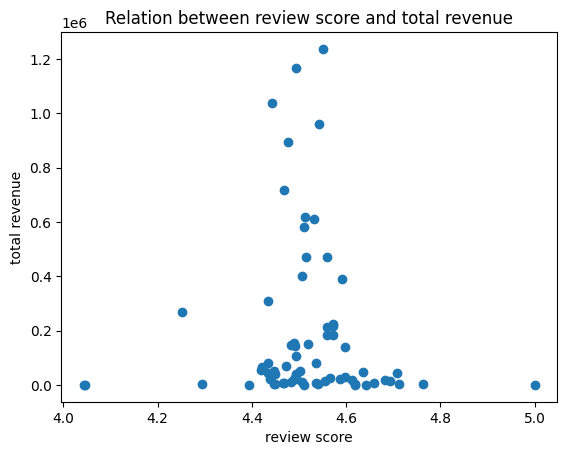

In [8]:
# Calculate the correlation
correlation = agg_df_1_1[('review_score','mean')].corr(agg_df_1_1[('price', 'sum')])
status = 'Positive-' if correlation >= 0 else 'Negative-'
status += 'Mid to strong' if abs(correlation) >= 0.5 else 'Low to no correlation'
print(f'The correlation between average review_score and total revenue over different products is {correlation:.2f} ({status})')

# Visualize the data
## Create figure and axis objects
fig, ax = plt.subplots()

## Create scatter plot
ax.scatter(agg_df_1_1[('review_score','mean')], agg_df_1_1[('price', 'sum')])

## Add title and labels
ax.set_title('Relation between review score and total revenue')
ax.set_xlabel('review score')
ax.set_ylabel('total revenue')

## Show plot
plt.show()

### Pertanyaan 2: Dimana lokasi geografis dengan tingkat penggunaan produk tertinggi.

In [9]:
# Create a dataframe based on df, orders, customers, and geolocations
df_2 = (
    pd.merge(
        df,
        modified_data['orders'][['order_id', 'customer_id']],
        how="left",
        on="order_id"
    )
    .merge(
        modified_data['customers'][['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'customer_zip_code_prefix']],
        how="left",
        on="customer_id"
    )
    .merge(
        modified_data['geolocations'][['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
        how="left",
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix"
    )
)

df_2.head()

,order_id,order_status,order_purchase_timestamp,review_score,review_comment_title,review_comment_message,price,freight_value,product_id,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,3149,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,4.0,Muito boa a loja,Muito bom o produto.,118.70,22.76,595fac2a385ac33a80bd5114aec74eb8,perfumery,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,BA,47813,47813,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,5.0,NaN,NaN,159.90,19.22,aa4383b373c6aca5d8797843e5594415,auto,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,75265,75265,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,5.0,NaN,O produto foi exatamente o que eu esperava e e...,45.00,27.20,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,59296,59296,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,5.0,NaN,NaN,19.90,8.72,65266b2da20d04dbe00c5c2d3bb7859e,stationery,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,9195,9195,-23.675037,-46.524784


In [10]:
# Aggregate the data
agg_df_2_1 = (
    df_2
    .groupby(['customer_state'])
    .agg({
        'customer_unique_id': ['nunique'],
        'order_id': ['count', 'nunique'],
    })
    .sort_values(by=('order_id','count'), ascending=False)
    .reset_index()
)

agg_df_2_1.head()

customer_state customer_unique_id order_id        
                            nunique    count nunique
0             SP              39156    46714   40501
1             RJ              11917    14224   12350
2             MG              11001    12995   11354
3             RS               5168     6182    5345
4             PR               4769     5673    4923

In [11]:
# Aggregate the data
agg_df_2_2 = (
    df_2
    .groupby(['customer_city', 'customer_state'])
    .agg({
        'customer_unique_id': ['nunique'],
        'order_id': ['count', 'nunique'],
    })
    .sort_values(by=('order_id','count'), ascending=False)
    .reset_index()
)

agg_df_2_2.head()

customer_city customer_state customer_unique_id order_id        
                                            nunique    count nunique
0       sao paulo             SP              14528    17524   15045
1  rio de janeiro             RJ               6361     7636    6601
2  belo horizonte             MG               2606     3113    2697
3        brasilia             DF               2013     2367    2071
4        curitiba             PR               1434     1734    1489

Top 5 highest product usage based on the customer's state:
- SP (46,714)
- RJ (14,224)
- MG (12,995)
- RS (6,182)
- PR (5,673)
Top 5 highest product usage based on the customer's city:
- Sao Paulo, SP (17,524)
- Rio De Janeiro, RJ (7,636)
- Belo Horizonte, MG (3,113)
- Brasilia, DF (2,367)
- Curitiba, PR (1,734)


C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\1743305304.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(agg_df_2_2.head()[('customer_city','')].str.title() + ' (' + agg_df_2_2.head()[('customer_state','')] + ')', rotation=30)


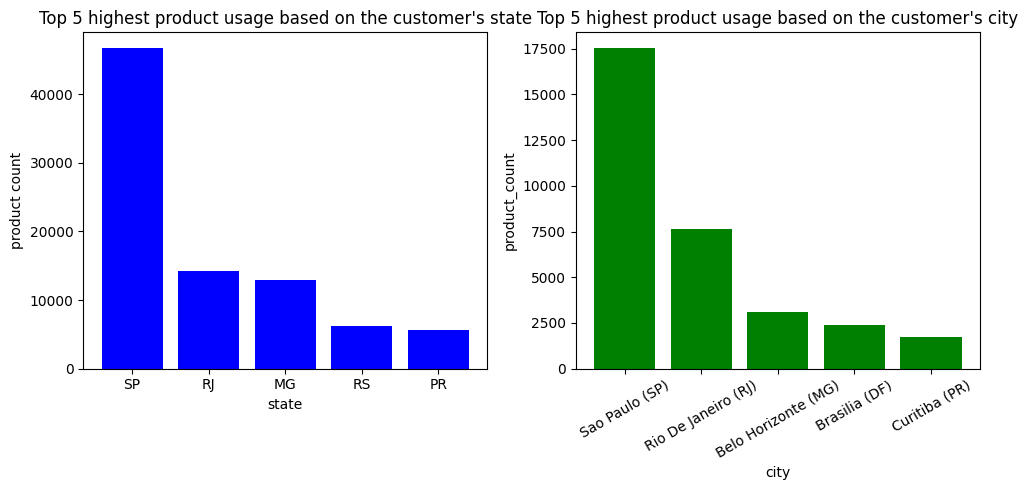

In [12]:
# Print top 5 highest product usage (order_id.count) based on the customer_city
points = '\n- '
print(f"Top 5 highest product usage based on the customer's state:\n- {points.join([rows[('customer_state','')]+' ('+'{:,}'.format(rows[('order_id', 'count')])+')' for i, rows in agg_df_2_1.head().iterrows()])}")

# Print top 5 highest product usage (order_id.count) based on the customer_city
points = '\n- '
print(f"Top 5 highest product usage based on the customer's city:\n- {points.join([str(rows[('customer_city','')]).title()+', '+rows[('customer_state','')]+' ('+'{:,}'.format(rows[('order_id', 'count')])+')' for i, rows in agg_df_2_2.head().iterrows()])}")

# Visualize the data
## Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

## Create the first bar plot
ax1.bar(agg_df_2_1.head()[('customer_state','')], agg_df_2_1.head()[('order_id', 'count')], color='blue')
ax1.set_title("Top 5 highest product usage based on the customer's state")
ax1.set_xlabel('state')
ax1.set_ylabel('product count')

## Create the second bar plot
ax2.bar(agg_df_2_2.head()[('customer_city','')].str.title() + '(' + agg_df_2_2.head()[('customer_state','')] + ')', agg_df_2_2.head()[('order_id', 'count')], color='green')
ax2.set_title("Top 5 highest product usage based on the customer's city")
ax2.set_xlabel('city')
ax2.set_xticklabels(agg_df_2_2.head()[('customer_city','')].str.title() + ' (' + agg_df_2_2.head()[('customer_state','')] + ')', rotation=30)
ax2.set_ylabel('product_count')

## Adjust layout to prevent overlap
plt.tight_layout()

## Show plot
plt.show()

**Insight:**
- The correlation between average review_score and total revenue over different products is -0.03 (Negative-Low to no correlation)
- Top 5 highest product usage based on the customer's state:
  - SP (46,714)
  - RJ (14,224)
  - MG (12,995)
  - RS (6,182)
  - PR (5,673)
- Top 5 highest product usage based on the customer's city:
  - Sao Paulo, SP (17,524)
  - Rio De Janeiro, RJ (7,636)
  - Belo Horizonte, MG (3,113)
  - Brasilia, DF (2,367)
  - Curitiba, PR (1,734)

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [13]:
## Create a dataframe based on df and df_2
df_3 = (
    df[['order_id', 'order_purchase_timestamp', 'price']]
    .groupby(['order_id'])
    .agg({
        'order_purchase_timestamp':'max',
        'price': 'sum'
    })
    .reset_index()
    .merge(
        (
            df_2[['order_id', 'customer_unique_id', 'geolocation_lat', 'geolocation_lng']]
            .drop_duplicates()
        ),
        how="left",
        on="order_id"
    )
    .rename(columns={'price':'revenue_w_o_freight'})
)

df_3.head()

,order_id,order_purchase_timestamp,revenue_w_o_freight,customer_unique_id,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.90,871766c5855e863f6eccc05f988b23cb,-21.758076,-41.312633
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,239.90,eb28e67c4c0b83846050ddfb8a35d051,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,199.00,3818d81c6709e39d06b2738a8d3a2474,-19.860439,-44.597972
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,12.99,af861d436cfc08b2c2ddefd0ba074622,-23.144923,-46.539830
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,199.90,64b576fb70d441e8f1b2d7d446e483c5,-23.249008,-46.824961


C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\938483374.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(rule='M', on='order_purchase_timestamp')
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\938483374.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(agg_df_3_1['month'], rotation=30)
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\938483374.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(agg_df_3_1['month'], rotation=30)


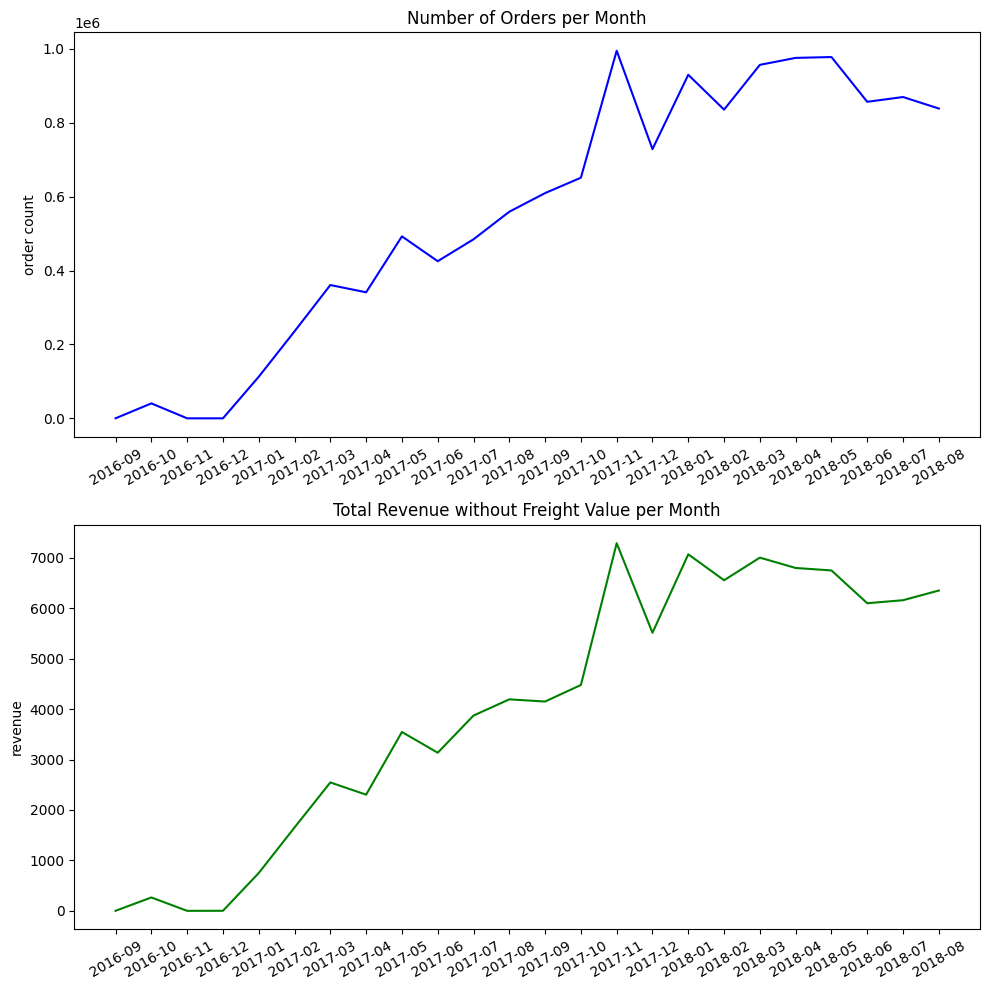

In [14]:
# Aggregate the data
agg_df_3_1 = (
    df_3
    .resample(rule='M', on='order_purchase_timestamp')
    .agg({
        "order_id": "nunique",
        "revenue_w_o_freight": "sum"
    })
    .reset_index()
    .rename(columns={
        'order_purchase_timestamp': 'month',
        'order_id': 'order_count'
    })
)

agg_df_3_1['month'] = agg_df_3_1['month'].dt.strftime('%Y-%m')

agg_df_3_1.head()

# Visualize the data
## Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

## Create the first bar plot
ax1.plot(agg_df_3_1['month'], agg_df_3_1['revenue_w_o_freight'], color='blue')
ax1.set_title("Number of Orders per Month")
ax1.set_ylabel('order count')
ax1.set_xticklabels(agg_df_3_1['month'], rotation=30)

## Create the second bar plot
ax2.plot(agg_df_3_1['month'], agg_df_3_1['order_count'], color='green')
ax2.set_title("Total Revenue without Freight Value per Month")
ax2.set_ylabel('revenue')
ax2.set_xticklabels(agg_df_3_1['month'], rotation=30)

## Adjust layout to prevent overlap
plt.tight_layout()

## Show plot
plt.show()

### Pertanyaan 4: Kategori produk apa yang paling banyak dan paling sedikit terjual?

C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\806210723.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_count", y="product_category_name_english", data=agg_df_4_1.head(5), palette=colors, ax=ax1)
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\806210723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_count", y="product_category_name_english", data=agg_df_4_1.sort_values(by="product_count", ascending=True).head(5), palette=colors, ax=ax2)


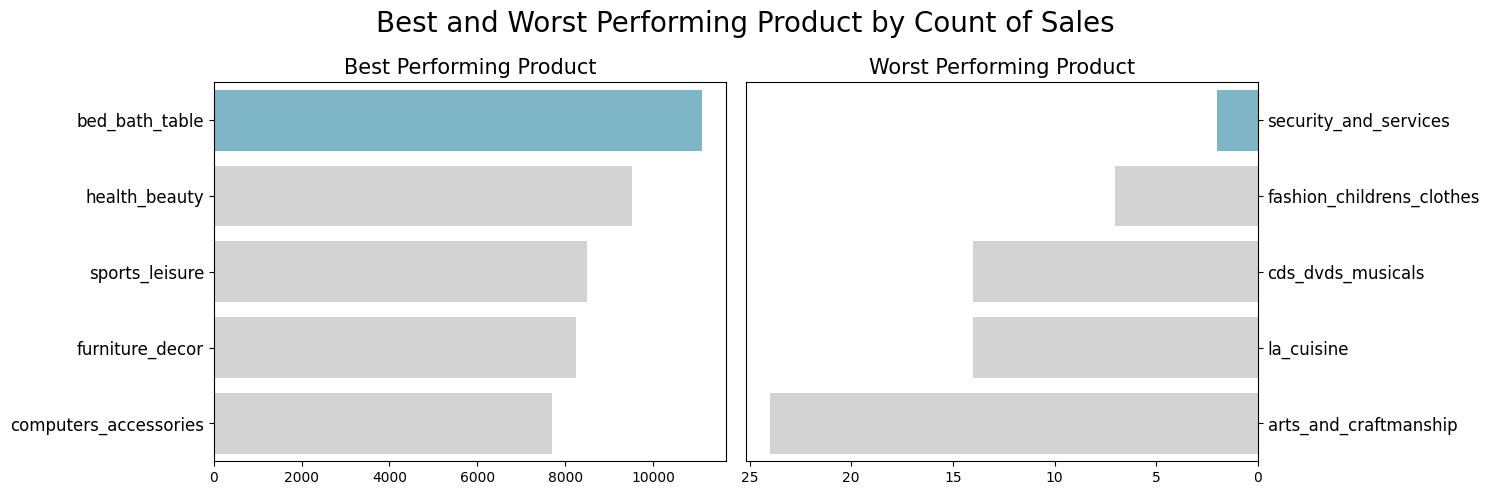

In [15]:
# Aggregate the data
agg_df_4_1 = (
    df
    .groupby(['product_category_name_english'])
    .agg({
        'order_id': 'count'
    })
    .sort_values(by='order_id', ascending=False)
    .reset_index()
    .rename(columns={'order_id':'product_count'})
)

agg_df_4_1.head()

# Visualize the data
## Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="product_count", y="product_category_name_english", data=agg_df_4_1.head(5), palette=colors, ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title("Best Performing Product", loc="center", fontsize=15)
ax1.tick_params(axis ='y', labelsize=12)
 

sns.barplot(x="product_count", y="product_category_name_english", data=agg_df_4_1.sort_values(by="product_count", ascending=True).head(5), palette=colors, ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_title("Worst Performing Product", loc="center", fontsize=15)
ax2.tick_params(axis ='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Count of Sales", fontsize=20)

## Adjust layout to prevent overlap
plt.tight_layout()

## Show plot
plt.show()

C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\3073858541.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue_w_o_freight", y="product_category_name_english", data=agg_df_4_2.head(5), palette=colors, ax=ax1)
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\3073858541.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue_w_o_freight", y="product_category_name_english", data=agg_df_4_2.sort_values(by="revenue_w_o_freight", ascending=True).head(5), palette=colors, ax=ax2)


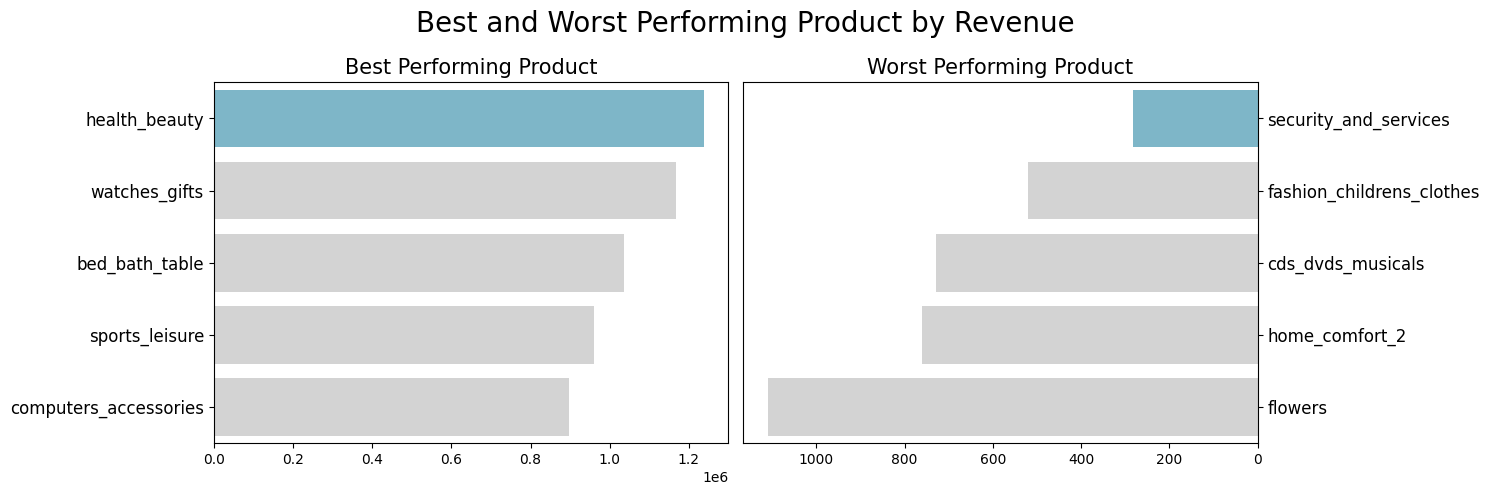

In [22]:
# Aggregate the data
agg_df_4_2 = (
    df
    .groupby(['product_category_name_english'])
    .agg({
        'price': 'sum'
    })
    .sort_values(by='price', ascending=False)
    .reset_index()
    .rename(columns={'price':'revenue_w_o_freight'})
)

agg_df_4_2.head()

# Visualize the data
## Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="revenue_w_o_freight", y="product_category_name_english", data=agg_df_4_2.head(5), palette=colors, ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title("Best Performing Product", loc="center", fontsize=15)
ax1.tick_params(axis ='y', labelsize=12)
 

sns.barplot(x="revenue_w_o_freight", y="product_category_name_english", data=agg_df_4_2.sort_values(by="revenue_w_o_freight", ascending=True).head(5), palette=colors, ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_title("Worst Performing Product", loc="center", fontsize=15)
ax2.tick_params(axis ='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Revenue", fontsize=20)

## Adjust layout to prevent overlap
plt.tight_layout()

## Show plot
plt.show()

### RFM Analysis
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [16]:
# Recency, Frequency, and Monetary (RFM) Analysis
## Create an rfm dataframe
rfm_df = (
    df_3
    .groupby(by="customer_unique_id", as_index=False)
    .agg({
        "order_purchase_timestamp": "max", 
        "order_id": "nunique",
        "revenue_w_o_freight": "sum" 
    })
)
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df_3["order_purchase_timestamp"].dt.date.max() + timedelta(days=1)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df = rfm_df.drop(columns=['max_order_timestamp'])
rfm_df = rfm_df.reset_index()
rfm_df.head()

,index,customer_id,frequency,monetary,recency
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,112
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,115
2,2,0000f46a3911fa3c0805444483337064,1,69.00,538
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,322
4,4,0004aac84e0df4da2b147fca70cf8255,1,180.00,289


C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\2453568769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="index", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\2453568769.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="index", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\mohfi\AppData\Local\Temp\ipykernel_16136\2453568769.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

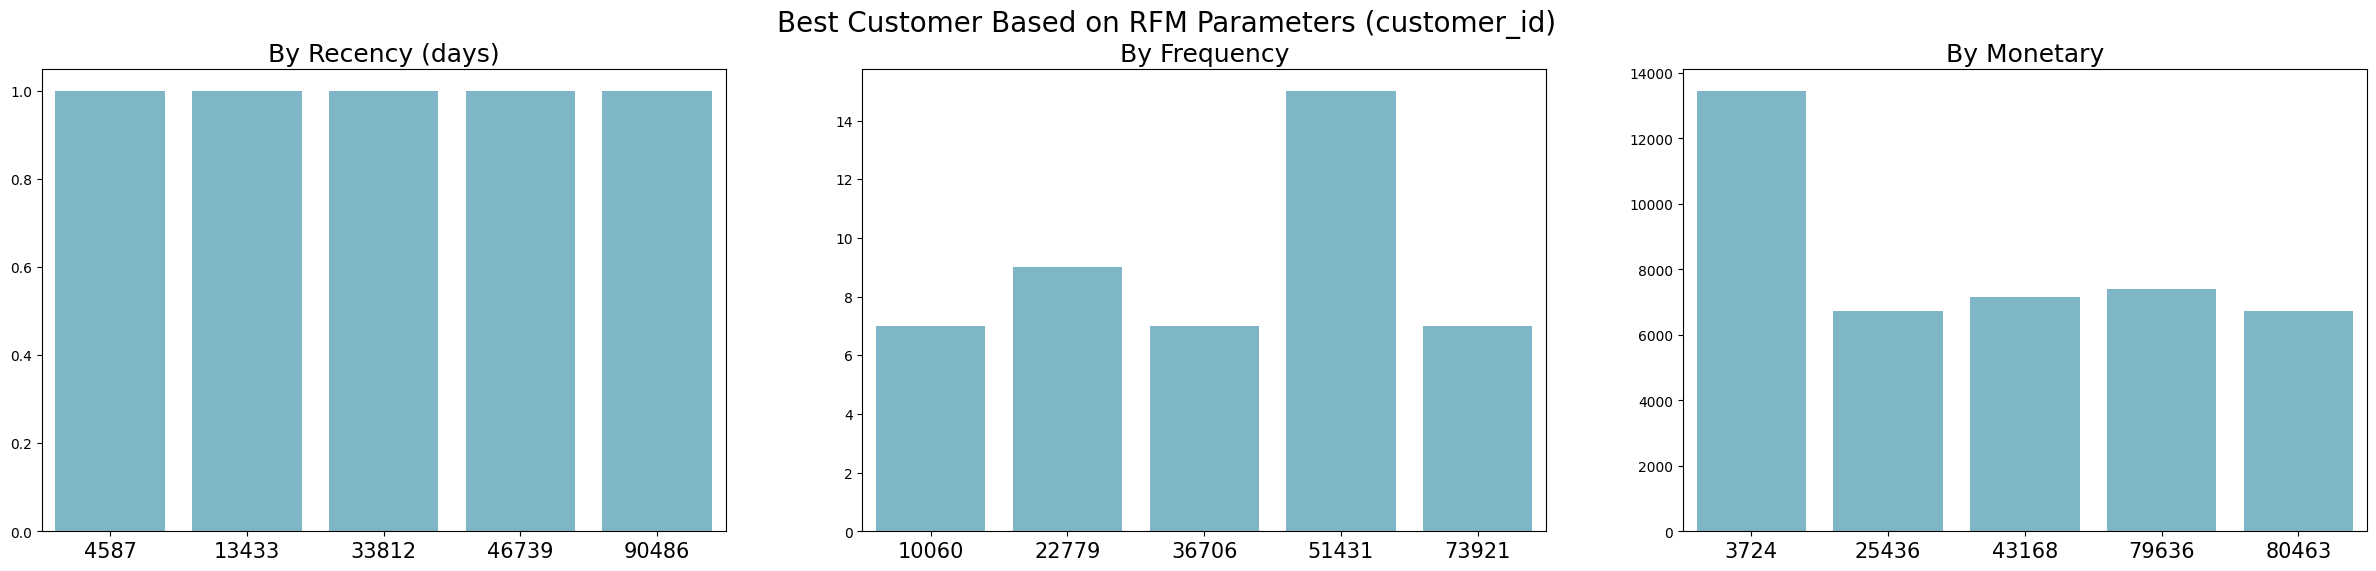

In [17]:
# Visualize the data
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="index", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="index", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="index", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Korelasi antara rerata penilaian ulasan dan total sales sangat lemah, sehingga belum bisa dikatakan saling berhubungan
- Berdasarkan negara bagian, penggunaan produk tertinggi ada di SP, sedangkan berdasarkan kota, penggunaan produk tertinggi ada di Sao Paulo, SP
- Performa penjualan tiga bulan terakhir mengalami sedikit kenaikan dari segi revenue, sedangkan dari segi jumlah order, mengalami sedikit penurunan
- Dari segi jumlah unit, produk yang paling banyak terjual adalah produk dengan kategori bed bath table, health beauty, sports leisure, furniture decor, dan computers accessories, sedangkan yang paling sedikit terjual adalah produk dengan kategori security and services, fashion children clothes, cds dvds musicals, la cuisine, dan arts and craftmanship. Namun, hal ini sedikit berbeda apabila dilihat dari performa dari segi revenue.
- Dari analisis RFM awal, *recency* dari 5 customer dengan *recency* terbaru rata-rata adalah satu hari, *frequency* dari 5 customer dengan *frequency* tertinggi adalah rata-rata sekitar 9 kali order, dan *monetary* dari 5 customer dengan *monetary* terbanyak adalah rata-rata sekitar 8 ribu satuan mata uang.